In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp310-cp310-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [10]:
reviews = pd.read_csv("critic_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<Axes: >

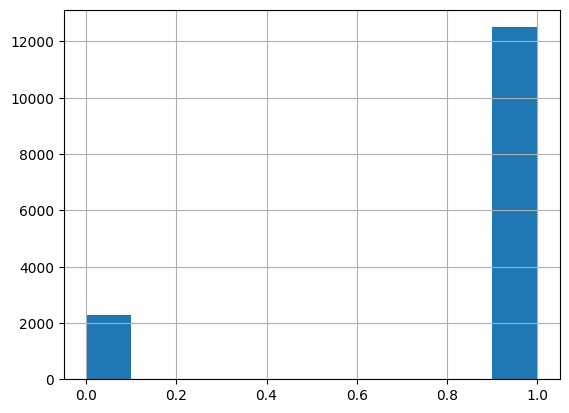

In [12]:
reviews['Sentiment'].hist()

In [13]:
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews

,Show,Sentiment,Review
5191,The Undoing,1,A twisty thriller that is glossy and decadentl...
11363,Stranger Things,1,"It’s hard not to get swept up in the warm, coz..."
5536,Lovecraft Country,1,"Lovecraft Country is, frankly, a complete hot ..."
11484,Money Heist: Korea - Joint Economic Area,1,Themes regarding traditionalism versus globali...
9560,A Very English Scandal,1,A richly textured true-crime miniseries that i...
...,...,...,...
13103,The Crown,1,This new set of episodes continues to give us ...
4677,Adventure Time,1,It's thrilling and sweet and a little bit tear...
4088,Watchmen,1,"If you've never read ""Watchmen,"" you will stil..."
10461,Casual,1,Casual is a brittle but sharp and adult comedy...


In [14]:
labeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 5191 to 9228
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7394 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [15]:
unlabeled_reviews.head()

,Show,Sentiment,Review
11873,Squid Game,1,Debt to a cruel system is inescapable and dehu...
5382,The O.C.,1,Just absolute O.C. perfection... You couldn't ...
5096,His Dark Materials,0,"[Though] it's timely and relevant in places, H..."
11387,Stranger Things,1,"Fresh locales, appealing new characters, and a..."
650,Prehistoric Planet,1,"A gorgeous, engrossing look at the creatures w..."


In [16]:
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 11873 to 11826
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7396 non-null   object
 1   Sentiment  7396 non-null   int64 
 2   Review     7396 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [18]:
unlabeled_reviews["Review"]

11873    Debt to a cruel system is inescapable and dehu...
5382     Just absolute O.C. perfection... You couldn't ...
5096     [Though] it's timely and relevant in places, H...
11387    Fresh locales, appealing new characters, and a...
650      A gorgeous, engrossing look at the creatures w...
                               ...                        
8581     While The Wilds might be "kids survive a plane...
9848     Even if "Legion" isn't the sum of its parts, s...
1772     While Star Trek: Strange New Worlds must stick...
5078                                  Pretty, pretty good.
11826              It just could have been so much better.
Name: Review, Length: 7396, dtype: object

https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

In [36]:
def train_model(df):
    vect = TfidfVectorizer()
    x = vect.fit_transform(df['Review'].values.astype('U'))
    # x = vect.fit_transform(labeled_data['Review'])
    y = df['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [37]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 11873 to 11826
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7396 non-null   object
 1   Sentiment  7396 non-null   int64 
 2   Review     7396 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [38]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [39]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
print(uncertainty)

[0.43101861 0.39219127 0.51315403 ... 0.40039424 0.65139273 0.99157963]


In [40]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new

,Show,Sentiment,Review
11674,Arcane: League of Legends,1,It was brilliant and twisted and dark and fun ...
9948,Community,1,The heart remains the same. If you loved it be...
3063,The Staircase,1,"Intriguing, absorbing, raw, and fascinating… O..."
2951,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
3553,Peacemaker,1,"James Gunn has crafted a heartfelt, twisted, a..."
...,...,...,...
7137,Once Upon a Time,1,"Season 7 got off to an admittedly bumpy start,..."
12583,The Queen's Gambit,1,"Not the best series Iv'e ever seen, but it's r..."
14155,Girls5eva,1,"In its second season, Girls5eva is as goofy an..."
3724,The Leftovers,1,The Leftovers cemented its legacy as one of th...


In [41]:
labeled_reviews_new.to_csv('temp.csv', index=False)

In [42]:
labeled_reviews_new = pd.read_csv("temp.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_reviews_new

,Show,Sentiment,Review
0,Arcane: League of Legends,1,It was brilliant and twisted and dark and fun ...
1,Community,1,The heart remains the same. If you loved it be...
2,The Staircase,1,"Intriguing, absorbing, raw, and fascinating… O..."
3,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
4,Peacemaker,1,"James Gunn has crafted a heartfelt, twisted, a..."
...,...,...,...
95,Once Upon a Time,1,"Season 7 got off to an admittedly bumpy start,..."
96,The Queen's Gambit,1,"Not the best series Iv'e ever seen, but it's r..."
97,Girls5eva,1,"In its second season, Girls5eva is as goofy an..."
98,The Leftovers,1,The Leftovers cemented its legacy as one of th...


In [43]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])

In [44]:
labeled_reviews_united

,Show,Sentiment,Review
5191,The Undoing,1,A twisty thriller that is glossy and decadentl...
11363,Stranger Things,1,"It’s hard not to get swept up in the warm, coz..."
5536,Lovecraft Country,1,"Lovecraft Country is, frankly, a complete hot ..."
11484,Money Heist: Korea - Joint Economic Area,1,Themes regarding traditionalism versus globali...
9560,A Very English Scandal,1,A richly textured true-crime miniseries that i...
...,...,...,...
95,Once Upon a Time,1,"Season 7 got off to an admittedly bumpy start,..."
96,The Queen's Gambit,1,"Not the best series Iv'e ever seen, but it's r..."
97,Girls5eva,1,"In its second season, Girls5eva is as goofy an..."
98,The Leftovers,1,The Leftovers cemented its legacy as one of th...


In [45]:
model, vect = train_model(labeled_reviews_united)

In [46]:
reviews_test = unlabeled_reviews
reviews_test

,Show,Sentiment,Review
11873,Squid Game,1,Debt to a cruel system is inescapable and dehu...
5382,The O.C.,1,Just absolute O.C. perfection... You couldn't ...
5096,His Dark Materials,0,"[Though] it's timely and relevant in places, H..."
11387,Stranger Things,1,"Fresh locales, appealing new characters, and a..."
650,Prehistoric Planet,1,"A gorgeous, engrossing look at the creatures w..."
...,...,...,...
8581,The Wilds,1,"While The Wilds might be ""kids survive a plane..."
9848,Legion,1,"Even if ""Legion"" isn't the sum of its parts, s..."
1772,Star Trek: Strange New Worlds,1,While Star Trek: Strange New Worlds must stick...
5078,Curb Your Enthusiasm,1,"Pretty, pretty good."


In [47]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1

0.9169054441260746